In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
s = stats.binom(500, 0.5)

In [5]:
s.cdf(272) - s.cdf(227)

0.9559365304210727

In [9]:
def is_covered(x, bound):
    lb, ub = bound
    if lb <= x and x <= ub:
        return True
    else:
        return False

In [62]:
n = 500
coverages = []
phis = np.linspace(0+1e-6, 1-1e-6, 100)
for phi in phis:
    xs = np.random.binomial(n, phi, size=100000)
    s = stats.beta(a=1+xs, b=1+n-xs)
    coverage = np.array([is_covered(phi, bound) for bound in np.array(s.interval(0.95)).T]).mean()
    coverages.append(coverage)

(0.8, 1.05)

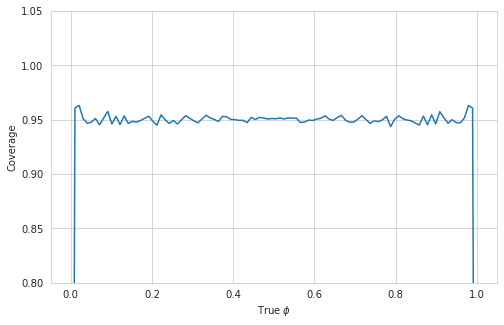

In [63]:
fig, ax = plt.subplots(figsize=(8, 5))
pd.DataFrame(np.c_[phis, coverages], columns=['phi', 'coverage']).set_index('phi').coverage.plot(ax=ax)
ax.set_ylabel('Coverage')
ax.set_xlabel('True $\\phi$')
ax.set_ylim(0.8, 1.05)